# Lecture 4: Deep learning

## 4.1. Deep learning - main elements

### 4.1.1. Concept

What is it?
- methodology in which we can train machine complex representations
- addresses the problem of learning hierarchical representations with a single (a few) algorithm(s)
- models with a feature hierarchy (lower-level features are learned at one layer of a model, and then those features are combined at the next level). 
- it's deep if it has more than one stage of non-linear feature transformation
- hierarchy of representations with increasing level of abstraction 
    * Image recognition 
        - Pixel → edge → texton → motif → part → object 
    * Text 
        - Character → word → word group → clause → sentence → story 
    * Speech 
        - Sample → spectral band → sound → … → phone → phoneme → word

Deep networks/architectures
- Convolutional NNs
- Auto-encoders
- Deep Belief Nets (Restricted Boltzmann machines)
- Recurrent Neural Networks 
- Generative Adversial Networks


Main characteristics:
- Collection of methods to improve the optimisation and generalisation of learning methods, especially NNs:
    * Rectified linear units
    * Dropout
    * Batch normalisation
    * Weight decay regularisation
    * Momentum learning

- Stacking layers of transformations to create successively more abstract levels of representation
    * Depth over breadth
    * Deep MLPs

- Shared parameters
    * Convolutional NNs
    * Recurrent NNs

- Technological improvements
    * Massively parallel processing: GPUs, CUDA
    * Fast libraries: Torch, cuDNN, CUDA-convNet, Theano




### 4.1.2. An ML algorithm as an optimisation approach 

An optimization problem     
- minimize the loss function 
- with respect to the parameters of the score function.

Reamrk:
- score function  
    * maps the raw data to class scores/labels
- loss function 
    * quantifies the agreement between the predicted scores and the ground truth scores/labels
    * ANN: quantifies the quality of any particular set of weights W
    * two components
        - the data loss computes the compatibility between the computed scores and the true labels. 
        - the regularization loss is only a function of the weights

Suppose a supervised classification problem
- Some input data (examples, instances, cases)
    * Training data – as pairs (attributeData_i, label_i), where:
        - i = 1, N (N = \# of training data)
        - $attributeData_i= (atri_1, atri_2, ..., atri_m)$, m – \# attributes (characteristics, features) for an input data
        - $label_i ϵ \{Label_1, Label_2, …, Label_{\#classes}\}$
    * Test data – as ($attributeData_i$), i = 1, n (n = \# of testing data).
- Determine
    * an unknown function that maps inputs (features) into outputs (labels)
    * output (label / class / value / score) associated to a new data by using the learnt function

Quality of learning
- Accuracy / Precision / Recall / etc
    * does not reflect the learnt decision model
- A loss function 
    * Expresses (encodes) the learnt model 
    * Difference between desired (D) and computed (C) output
    * L2 norm - Quadratic cost (mean squared error) 
    > $ \sum{|| D – C||^2}$  
    * L1 norm 
    > $ \sum{| D – C|} $
    * SVM loss (hinge loss, max-margin loss) 
    > $ \sum_{i}{\sum_{j, j ≠ y_i}{max(C_j – D_{y_i} + \Delta, 0)}}$
    * Softmax loss 
    > $ \sum_{i}{\frac{- ln(exp(D_{y_i}))}{\sum_{j, j ≠ y_i}{exp(C_j)}}}$
    * Cross-entropy 
    > $-\sum{\frac{D ln C + ( 1 – D) ln(1 - C)}{n}}$ 

Several important mappings
- Constant f(x) = c
- Step f(x) = a, if x < theta, and b, otherwise  
- Linear f(x) = a x + b
- Sigmoid σ(x) = 1 / (1 + e^{−x}) (avoid it in a Conv NN)
- Hyperbolic tangent function tanh(x) = 2 σ(2x) − 1
- Rectified linear neuron/unit (ReLU) f(x) = max(0, x)
- Leak ReLU (Parametric rectifier) f(x) = max(α x, x)
- Maxout max(w^T_1x + b_1,w^T_2x + b_2)
- Exponential linear units (ELU)  f(x) = x, if x > 0 and α (exp(x) – 1), if x ≤ 0


A linear classifier

> $f(x, w) = w · x + b$

  >> $w \in R^{\#classes \times \#features}$ 

  >> $x \in R^{\#features \times 1}$

  >> $b \in R^{\#classes}$

A non linear classifier 

> $f(x, w) = w_2 max(0, w_1 · x + b_1) + b_2$,
    
  >> $w_1 \in R^{PARAM \times \#features}$ 
  
  >> $x \in R^{\#features \times 1}$
  
  >> $b_1 \in R^{PARAM}$
  
  >> $w_2 \in R${\#classes \times PARAM}$
  
  >> $b_2 \in R^{\#classes}$






**Classical ANN**

Architectures – special graphs with nodes placed on layers 
- Layers 
    * Input layer – size = input’s size (#features)
    * Hidden layers – various sizes (#layers, # neurons/layer)
    * Output layers – size = output size (e.g. # classes)
- Topology
    * Full connected layers (one-way connections, recurrent connections)

Mechanism
- Neuron activation
    * Constant, step, linear, sigmoid
- Cost & Loss function -> smooth cost function (depends on w & b)
    * Difference between desired (D) and computed © output
    * Quadratic cost (mean squared error)
    > $\frac{\sum{|| D – C||^2}}{2n}$
    * Cross-entropy
    >  $-\sum{\frac{D ln C + ( 1 – D) ln(1 - C)}{n}}$ 

Learning algorithm 
- Perceptron rule
- Delta rule (Simple/Stochastic Gradient Descent)







**Convolutional NNs**

Main characteristics:
- More layers
- More nodes/layer

Topology of connections
- Regular NNs -> fully connected
    * O(\#inputs x \#outputs)
- Conv NNs -> partially connected
    * connect each neuron to only a local region of the input volume
    * O(\#someInputs x \#outputs)

 <img src="images\anns.png" alt="networks" width="400"/>


Topology of layers
- Regular NNs -> linear layers
- Conv NNs -> 2D/3D layers (width, height, depth)

<img src="images/cnn.png" alt="conv networks"/>

**Convolutional layer**

Aim 
- learn data-specific kernels
- perform a liniar  (see this [material](https://arxiv.org/pdf/1603.07285v1.pdf) for math explanations)

Filters or Local receptive fields or Kernels
- Content
    * convolution (signal theory) vs. Cross-correlation 
    * a little (square/cube) window on the input pixels
- How it works?
    * slide the local receptive field across the entire input image
- Size
    * size of field / filter (F)
    * Stride (S)
- Learning process
    * each hidden neuron has 
        - FxF shared weights connected to its local receptive field
        - a shared bias
        - an activation function
    * each connection learns a weight
    * the hidden neuron learns an overall bias as well
    * all the neurons in the first hidden layer detect exactly the same feature (just at different locations in the input image) -> map from input to the first hidden layer = feature map / activation map

How does it work?

- Take an input I (example, instance, data) of various dimensions 
    * a signal -> 1D input (I_{length})
    * a grayscale image -> 2D input (I_{Width} & I_{Height})
    * an RGB image -> 3D input (I_{Width}, I_{Height} & I_{Depth} = 3) 
- Consider a set of filters (kernels) F_1, F_2, ..., F_{#filters}
    * A filter must have the same \# dimensions as the input
        - A signal -> 1D filter 
        > F_{length} << I_{length}
        - a grayscale image -> 2D filter 
        > F_{width} << I_{width} & F_{height} << I_{height}
        - an RGB image -> 3D filter
        > F_{width} << I_{width} & F_{height} << I_{height} &  F_{depth} = I_{Depth} = 3
- Apply each filter over the input
    * Overlap filter over a window of the input
        - Stride
        - Padding 
    * Multiply the filter and the window
    * Store the results in an activation map
        - \# activation maps = # filters
- Activate all the elements of each activation map
    * ReLU or other activation function

<img src="images/filter1.png" alt="filters" width="400"/>

     
<img src="images/filter2.png" alt="filters" width="400"/>


<img src="images/filter3.png" alt="filters" width="400"/>





**Hyperparameters**

- input volume size N (L or WI & HI or WI & HI & DI)
- size of zero-padding of input volume P (PL or PW & PH or PW & PH & PD)
- the receptive field size (filter size) F (FL, FW & FH, FW & FH & FD) 
- stride of the convolutional layer S (SL, SW & SH, SW & SH & SD)
- \# of filters (K)
- depth of the output volume 

\# neurons of an activation map =  (N + 2P − F)/S+1

Output size (O or WO & HO or WO & HO & DO)
- K * [(N + 2P − F)/S+1]

N = L = 5, P = 1, 
- F = 3, S = 1
- F = 3, S = 2

<img src="images/hyperparam.png" alt="hyperparameters" width="400"/>

<img src="images/convComputing.png" alt="convolution" width="400"/>

<img src="images/sliding.png" alt="sliding" width="400"/>


**Convolutional layer** – typology 

- Classic convolution
    
    * one filter, D channels
    
    <img src="images/oneFilter.png" alt="convolution" width="600"/>

    * more filters (K), D channels

    <img src="images/moreFilters.png" alt="convolution" width="600"/>

- Transposed convolution (deconvolution)

    * See [article](https://arxiv.org/pdf/1603.07285.pdf)
    
    <img src="images/transposedConv.gif" alt="convolution" width="200"/>
    
    * utility
        - Up-sampling - How? 

            > $ ImgLarge * F = ImgSmall$

            > $ ImgLarge * F * F^T = ImgSmall* F^T $

            > $ ImgLarge * I = ImgSmall * F^T $

            > $ ImgLarge = ImgSmall * F^T $

            - image generation - in GANs (Generative Adversial Networks (future lecture)
        
        - semantic segmentation -> Autoencoders (future lecture)

    * more details [link](https://distill.pub/2016/deconv-checkerboard/)

    

- Dilated convolution (atrous convolution)

    * see [link](https://arxiv.org/pdf/1511.07122.pdf)

    <img src="images/dilatedConv.gif" alt="convolution" width="400"/>

    * utility
        - working with higher resolution images, but fine-grained details are still important
        - constructing a network with fewer parameters
        - broader view of the input to capture more contextual information


(8, 8, 1)
(32, 32, 1)


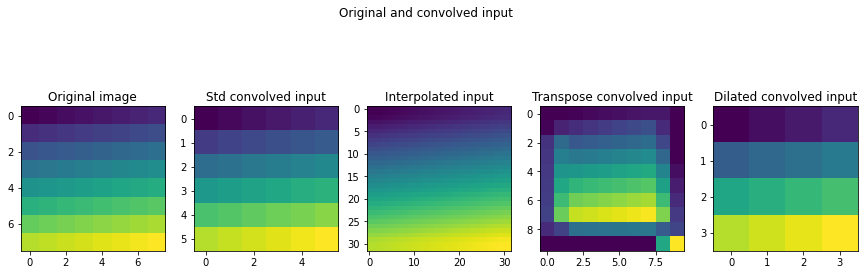

In [2]:
# different convolutions

import keras
from keras.models import Sequential
from keras.layers import UpSampling2D, Conv2DTranspose, Conv2D
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
img_size = 8
input_flattened = np.arange(0, img_size * img_size / 2, 0.5)
input_image = np.reshape(input_flattened, (img_size, img_size, 1))
input_image_shape = np.shape(input_image)
print(input_image_shape)
input_image_shape = (input_image_shape[0], input_image_shape[1], 1)

# apply different conv
# std conv
model1 = Sequential()
model1.add(Conv2D(12, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_image_shape))

# interpolation
model2 = Sequential()
model2.add(UpSampling2D((4, 4), input_shape=input_image_shape, interpolation='bilinear'))

# transposed cond
model3 = Sequential()
model3.add(Conv2DTranspose(32, kernel_size=(3,3), input_shape=input_image_shape, activation='relu', kernel_initializer='he_normal'))

# dilated conv
model4 = Sequential()
model4.add(Conv2D(12, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_image_shape, dilation_rate=(2,2)))


# Perform conv and obtain the output
input = np.array([input_image])
output1 = model1.predict(input)[0]
output2 = model2.predict(input)[0]
print(output2.shape)
output3 = model3.predict(input)[0]
output4 = model4.predict(input)[0]

# Visualize input and output
fig, axes = plt.subplots(1, 5, figsize=(15,5))
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(output1[:, :, 0])
axes[1].set_title('Std convolved input')
axes[2].imshow(output2[:, :, 0])
axes[2].set_title('Interpolated input')
axes[3].imshow(output3[:, :, 0])
axes[3].set_title('Transpose convolved input')
axes[4].imshow(output4[:, :, 0])
axes[4].set_title('Dilated convolved input')

fig.suptitle(f'Original and convolved input')
plt.show()

In [ ]:
another example - an encoder-decoder


Epoch 1/3
48/48 [==============================] - 174s 4s/step - loss: 0.2971 - val_loss: 0.0907
Epoch 2/3
48/48 [==============================] - 173s 4s/step - loss: 0.0789 - val_loss: 0.0744
Epoch 3/3
48/48 [==============================] - 173s 4s/step - loss: 0.0697 - val_loss: 0.0681


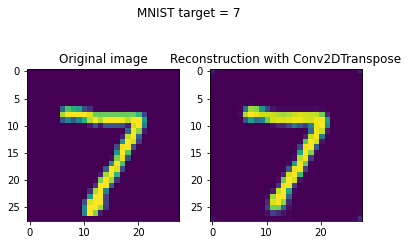

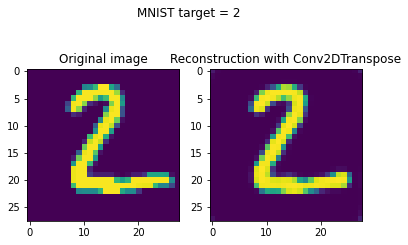

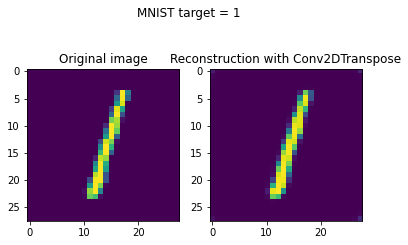

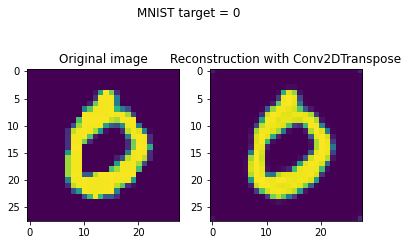

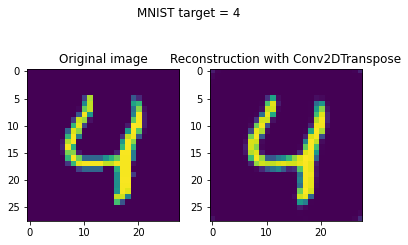

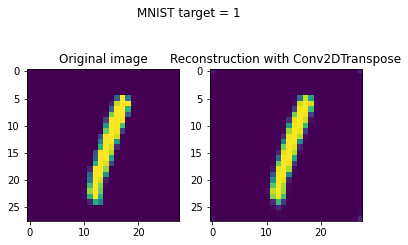

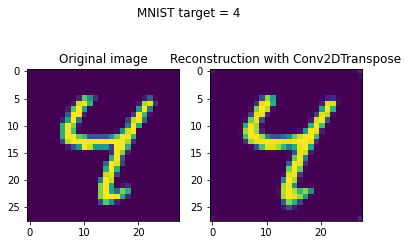

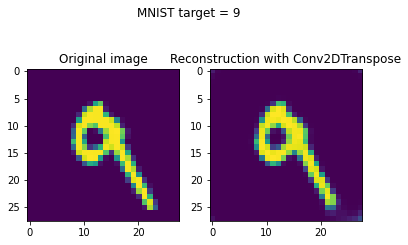

In [4]:
# encoder-decoder example that uses convolution and deconvolution
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

# Model configuration
img_width, img_height = 28, 28
batch_size = 1000
no_epochs = 3
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(input_train, input_train,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

# Generate reconstructions
num_reconstructions = 8
samples = input_test[:num_reconstructions]
targets = target_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Get the sample and the reconstruction
  sample = samples[i][:, :, 0]
  reconstruction = reconstructions[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 2)
  # Plot sample and reconstruciton
  axes[0].imshow(sample)
  axes[0].set_title('Original image')
  axes[1].imshow(reconstruction)
  axes[1].set_title('Reconstruction with Conv2DTranspose')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()



- Spatial separable (depth-wise separable) convolution
    
    * Split the convolution into
        
        - A depthwise convolution <img src="images/depthWiseConv.png" alt="convolution" width="400"/>

        - A pointwise convolution 

        <img src="images/pointWiseConv1.png" alt="convolution" width="400"/>

        <img src="images/pointWiseConv2.png" alt="convolution" width="400"/>   

    * E.g. Sobel operator

    <img src="images/stdVsDepthwiseConv.png" alt="convolution" width="900"/>   

    * standard versus spatial separable 

| standard (classic) | | spatial separable |
| :--- | :---: |:--- |
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ |
| 1 filter: $F_w \times F_H \times F_D = 5 \times 5 \times 3$ | | 3 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 1$ |
| | | 1 filter $F'_W \times F'_H \times F'_D = 1 \times 1 \times 3$ | | 
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times 1$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times 256$ |
| 1 * (5 * 5 * 3) * (8 * 8) = 4 800 | | 3 * (5 * 5) * (8 * 8) = 4 800 |
| | | 1 * (1 * 1 * 3) * (8 * 8) = 192 |
| => 4 800 ops. | | => 4 992 ops |
|--------------------------------|---|--------------------------------|
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times 3$ |
| 256 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 3$ | | 3 filters: $F_w \times F_H \times F_D = 5 \times 5 \times 1$ |
| | | 256 filters $F'_W \times F'_H \times F'_D = 1 \times 1 \times 3$ | 
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times 256$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times 256$ |
| 256 * (5 * 5 * 3) * (8 * 8) =  1 228 800 | | 3 * (5 * 5) * (8 * 8) = 4800 |
| | | 256 * (1 * 1 * 3) * (8 * 8) = 49 152 |
| => 1 228 800 ops. | | => 53 952 ops |


- Grouped convolutions
    
    * See [article](https://arxiv.org/pdf/1605.06489.pdf)
    
    * Efficient training (More GPUs) => model parallelisation
    
    * Fewer parameters 
    
    * Better representations
    
<img src="images/groupConv1.png" alt="convolution" width="400"/>
    * see laso these materials [link](https://blog.yani.ai/filter-group-tutorial/) [link](https://arxiv.org/abs/1707.09855)
   
<img src="images/groupConv2.png" alt="convolution" width="400"/>

| standard (classic) convolution | | grouped convolution|
| :--- | :---: |:--- |
|  |  |  |
| Image: $W_I \times H_I \times D_I = 12 \times 12 \times D_I$ | | Image: $W_I \times H_I \times D_I = 12 \times 12 \times D_I $ |
| $D_O$ filters: $F_w \times F_H \times D_I = 5 \times 5 \times D_I $ | | $\frac{D_O}{2}$  filters: $F_w \times F_H \times \frac{D_I}{2} = 5 \times 5 \times \frac{D_I}{2}$ |
| | | $\frac{D_O}{2}$ filter $F'_W \times F'_H \times \frac{D_I}{2} = 5 \times 5 \times \frac{D_I}{2}$ | 
| | | |
| No padding: P = 0 | | No padding: P = 0 | 
| Stride 1: S = 1 | | Stride 1: S = 1 |
| Output: $W_O \times H_o \times D_O = 8 \times 8 \times D_O$ | | Output: $W_O \times H_O \times D_O = 8 \times 8 \times D_O$ |
| | | |
| #operations: $F_W \times F_H \times D_I \times D_O = 5 \times 5 \times D_I \times D_O$ | | #operations: $[F_W \times F_H \times \frac{D_I}{2} \times \frac{D_O}{2}\ \times 2 = 5 \ times 5 \times D_I \times \frac{D_O}{2} $|


In [5]:
# standard convolution vs. depthwise separable convolutions
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras import backend as K

# Model configuration
img_width, img_height = 28, 28
batch_size = 50
no_epochs = 3
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Convert them into black or white: [0, 1].
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
# standard conv
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# depthwise separable conv -> check the training time for an epoch
model.add(SeparableConv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# standard conv
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# depthwse separable conv
model.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/3
960/960 [==============================] - 39s 40ms/step - loss: 0.3154 - accuracy: 0.9045 - val_loss: 0.1000 - val_accuracy: 0.9686
Epoch 2/3
960/960 [==============================] - 38s 40ms/step - loss: 0.1152 - accuracy: 0.9631 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 3/3
960/960 [==============================] - 36s 38ms/step - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.0580 - val_accuracy: 0.9822
Test loss: 0.04996929317712784 / Test accuracy: 0.9837999939918518


## Pooling layer

### Aim

- progressively reduce the spatial size of the representation <img src="images/poolingFLow.png" alt="pooling" width="200"/>
    * to reduce the amount of parameters and computation in the network 
    * to also control overfitting

- a subsampling step
    * downsample the spatial dimensions of the input.

- simplify the information in the output from the convolutional layer

 
### How it works?

- takes each feature map output from the convolutional layer and prepares a condensed feature map

- each unit in the pooling layer may summarize a region in the previous layer <img src="images/poolingSketch.png" alt="pooling" width="200"/>

- apply pooling filters to each feature map separately
    * Pooling filter size (spatial extent of pooling) PF
    * Pooling filter stride PS
    * No padding

- resizes it spatially, using <img src="images/maxPooling.png" alt="pooling" width="200"/>
    * the MAX operation
    * the average operation
    * Lp norm: $L_p = \sqrt[p]{\sum{x^p}}$
        - L2-norm operation (square root of the sum of the squares of the activations in a rectangular neighbourhood/region) <-> p = 2
    * Log prob PROB: $L_{prob} = \frac{1}{b} \log{\sum{e^{bx}}}$

Two reasons:

- Dimensionality reduction

<img src="images/poolingFlow.png" alt="pooling" width="200"/>

- Invariance to transformation (rotation, translation) <img src="images/rotTransInv.png" alt="pooling" width="200"/>

    * Small translations – e.g. Max pooling

    <img src="images/maxPooling2.png" alt="pooling" width="200"/>

    * When? => if we care about whether a feature is present rather than exactly where it is (eg. rotation)

    <img src="images/rotationPooling.png" alt="pooling" width="200"/>



- Size conversion

    * Input: $K \times N$

    * Output: $ K \times [(N – PF) / PS + 1]$

- Typology

    * Local pooling (patch-based pooling)

    * Global pooling (image-based pooling) 

Reamrks:
- introduces zero parameters since it computes a fixed function of the input

- note that it is not common to use zero-padding for Pooling layers

- pooling layer with PF=3,PS=2 (also called overlapping pooling), and more commonly PF=2, PS=2

- pooling sizes with larger filters are too destructive

- keep track of the index of the max activation (sometimes also called the switches) so that gradient routing is efficient during backpropagation



(8, 8, 1)


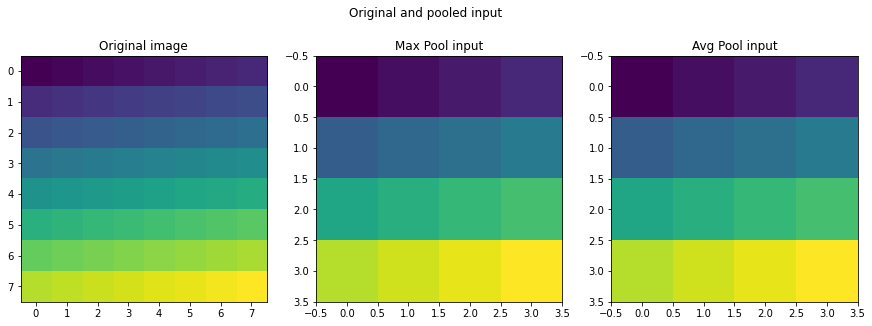

In [6]:
# pooling examples

import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
img_size = 8
input_flattened = np.arange(0, img_size * img_size / 2, 0.5)
input_image = np.reshape(input_flattened, (img_size, img_size, 1))
input_image_shape = np.shape(input_image)
print(input_image_shape)
input_image_shape = (input_image_shape[0], input_image_shape[1], 1)

# Create models with different poolings
model1 = Sequential()
model1.add(AveragePooling2D(pool_size=(2, 2)))

model2 = Sequential()
model2.add(AveragePooling2D(pool_size=(2,2)))


# Perform pooling
output1 = model1.predict(np.array([input_image]))[0]
output2 = model2.predict(np.array([input_image]))[0]

# Visualize input and output
fig, axes = plt.subplots(1, 3, figsize = (15,5))
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(output1[:, :, 0])
axes[1].set_title('Max Pool input')
axes[2].imshow(output2[:, :, 0])
axes[2].set_title('Avg Pool input')
fig.suptitle(f'Original and pooled input')
plt.show()


## Fully-connected layer

Neurons have full connections to all inputs from  the previous layer    <img src="images/fullyConnected.png" alt="fullyCOnnected" width="200"/>

- Various activations
    * ReLU (often)


## Output layer

### Multiclass SVM

Largest score indicates the correct answer

> Hinge loss: <img src="images/hingeLoss.png" alt="svmLoss" width="200"/>

>   * $L_i = \sum_{j \neq y_i}{
    \begin{cases} 
        0, s_{y_i} \geq s_j, \\ 
        s_j - s_{y_i} + 1, otherwise\\ 
    \end{cases}}$ 
    
>   * $L_i = \sum_{j \neq y_i}{max(0, s_j - s_{y_i} + 1)}$ 

 > Example: <img src="images/svmLoss.gif" alt="svmLoss" width="200"/>

 >  * Loss = (2.9 + 0 + 12.9) / 3 = 5.27


### Softmax (normalized exponential function)

- Largest probability indicates the correct answer

- converts raw scores to probabilities <img src="images/softmaxLoss.png" alt="softmaxLoss" width="400"/>

- "squashes" a #classes-dimensional vector z of arbitrary real values to a #classes-dimensional vector σ(z) of real values in the range (0, 1) that add up to 1
σ(z)j = exp(zj)/∑k=1..#classes exp(zk)


In [ ]:
Note:
- Images taken from Andrej Karpathy’s lectures about Conv NNs